<a href="https://colab.research.google.com/github/Sagar856/Data-Science/blob/main/Car_Price_Pridiction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [4]:
Toyoto_Corrola = pd.read_csv('/content/Toyoto_Corrola.csv')
Toyoto_Corrola.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [5]:
data = Toyoto_Corrola.drop(['Id', 'Model'], axis=1)

In [6]:
data.head()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Doors      1436 non-null   int64
 5   Cylinders  1436 non-null   int64
 6   Gears      1436 non-null   int64
 7   Weight     1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


In [9]:
# Checking for null values
data.isna().sum()

Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [10]:
# Checking for correlation matrix
data.corr()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


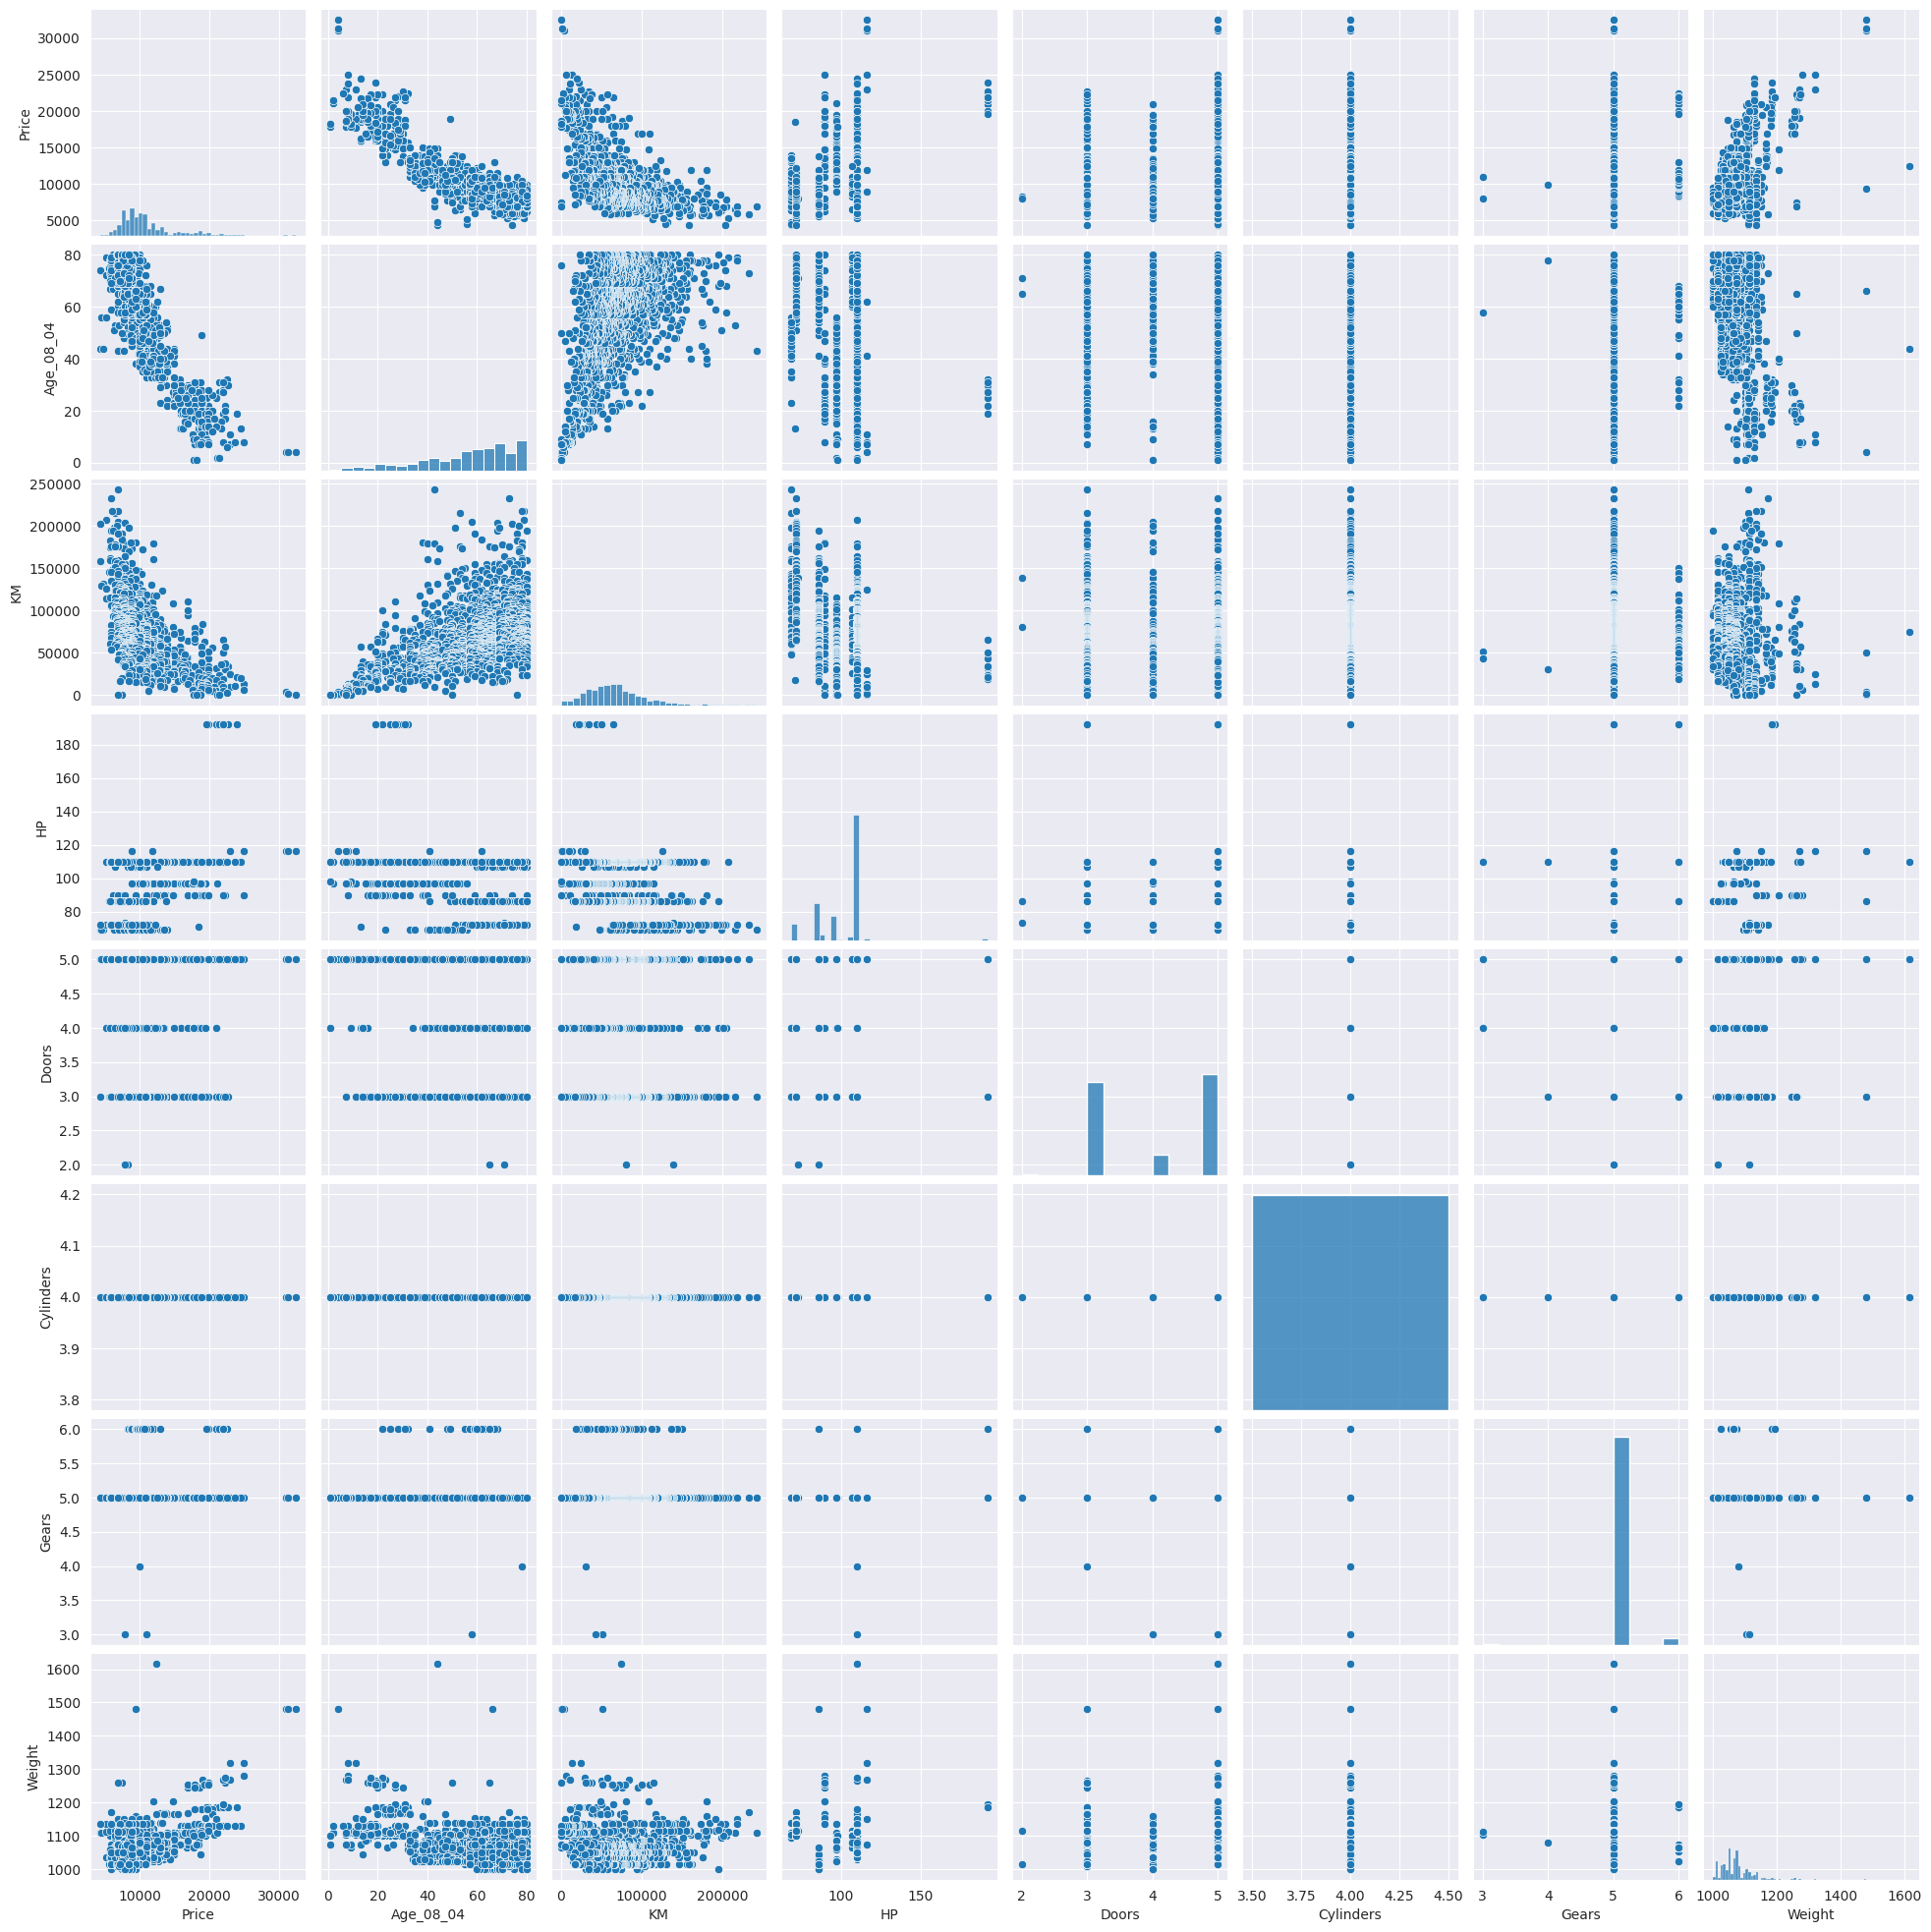

In [12]:
# Scatter plots and Pairplots
sns.set_style(style = 'darkgrid')
sns.pairplot(data)

In [57]:
data = data.rename({'Age_08_04': 'Age'}, axis = 1)

In [58]:
data[data.duplicated()]

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
113,24950,8,13253,116,5,4,5,1320


In [60]:
data = data.drop_duplicates().reset_index(drop=True)

In [61]:
data[data.duplicated()]

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight


In [62]:
# Model Building
model = smf.ols('Price~Age+KM+HP+Doors+Cylinders+Gears+Weight', data = data).fit()

In [63]:
# Model Parameters
model.params

Intercept    -402.293367
Age          -122.288250
KM             -0.019928
HP             28.327782
Doors          -8.715826
Cylinders   -1609.173467
Gears         625.297840
Weight         18.455133
dtype: float64

In [65]:
# T-values and P-values
print(model.tvalues)
print(np.round(model.pvalues, 5))

Intercept    -5.204801
Age         -46.774676
KM          -16.490150
HP           10.840831
Doors        -0.218061
Cylinders    -5.204801
Gears         3.169455
Weight       22.141591
dtype: float64
Intercept    0.00000
Age          0.00000
KM           0.00000
HP           0.00000
Doors        0.82741
Cylinders    0.00000
Gears        0.00156
Weight       0.00000
dtype: float64


In [66]:
# r-squared values
(model.rsquared, model.rsquared_adj)
# Current model accuracy is 86.15%, so it need to improve

(0.8615946984866649, 0.8610131636063568)

### Individual simple reg models

In [67]:
# Build SLR and MLR models for insignificant variable 'Doors' (its 'p' value is greater than 0.05)
# Also find their t-values and p-values

In [70]:
# Regression model

ml_doors = smf.ols('Price~Doors',data=data).fit()
print(ml_doors.tvalues)
print(np.round(ml_doors.pvalues, 4))

Intercept    19.421546
Doors         7.070520
dtype: float64
Intercept    0.0
Doors        0.0
dtype: float64


# Model Validation techniques

Two techniques: 1. Collinearity check, 2. Residual analysis

In [71]:
# Collinearity check
# Calculating VIF for all independant variables

rsq_age = smf.ols('Age~KM+HP+Doors+Cylinders+Gears+Weight', data = data).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age+HP+Doors+Cylinders+Gears+Weight', data = data).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~KM+Age+Doors+Cylinders+Gears+Weight', data = data).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_doors = smf.ols('Doors~KM+Age+HP+Cylinders+Gears+Weight', data = data).fit().rsquared
vif_doors = 1/(1-rsq_doors)

rsq_cylin = smf.ols('Cylinders~KM+Age+HP+Doors+Gears+Weight', data = data).fit().rsquared
vif_cylin = 1/(1-rsq_cylin)

rsq_gears = smf.ols('Gears~KM+Age+HP+Doors+Cylinders+Weight', data = data).fit().rsquared
vif_gears = 1/(1-rsq_gears)

rsq_weight = smf.ols('Weight~KM+Age+HP+Doors+Cylinders+Gears', data = data).fit().rsquared
vif_weight = 1/(1-rsq_weight)

# Storing VIF values in dataframe
d1 = {'Variables':['Age','Km','HP','Doors','Cylinders','Gears','Weight'], 'VIF':[vif_age,vif_km,vif_hp,vif_doors,vif_cylin,vif_gears,vif_weight]}
Vif_data = pd.DataFrame(d1)
Vif_data

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Variables,VIF
0,Age,1.866057
1,Km,1.626264
2,HP,1.214147
3,Doors,1.148708
4,Cylinders,0.000000
5,Gears,1.096575
6,Weight,1.502749


In [ ]:
# None Variable has VIF > 20, i.e. no collinearity, so consider all variables in regression equation

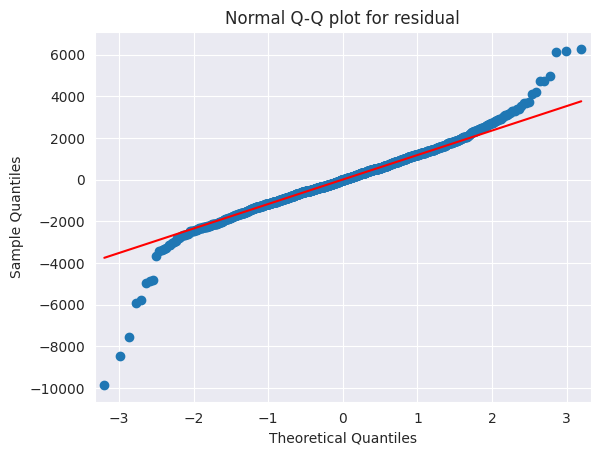

In [72]:
# RESIDUAL ANALYSIS
# TESTING FOR NORMALITY OF RESIDUAL ANALYSIS (Q-Q PLOTS) (residual model 'model.resid')

import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot for residual')
plt.show()

In [75]:
#Outlier detection from Q-Q plots
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [74]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

In [76]:
# TEST FOR HOMOSCEDASTICITY / HETROSCEDASTICITY
# (plotting model's standardized fitted values vs standerdized residual)

def get_standerdized_values(vals):
  return (vals - vals.mean())/vals.std()

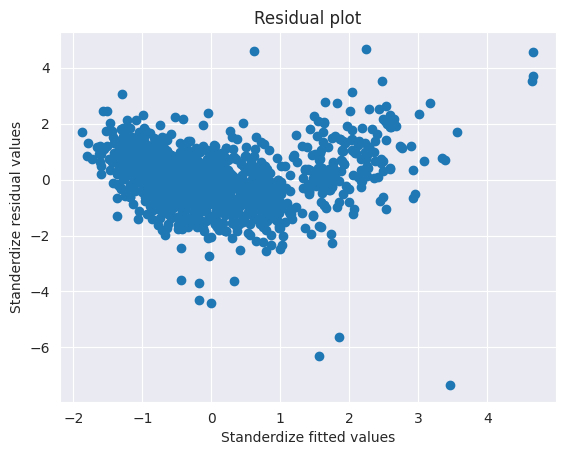

In [77]:
plt.scatter(get_standerdized_values(model.fittedvalues),get_standerdized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standerdize fitted values')
plt.ylabel('Standerdize residual values')
plt.show()

In [79]:
data.head(1)

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165


In [ ]:
# Test for errors or residuals Vs regressors of independant 'x' variables or predictors
# Using residual regression plots code graphics.plot_regress_exog(model, 'x', fig)
# exog = x-variable & endog = y-variable

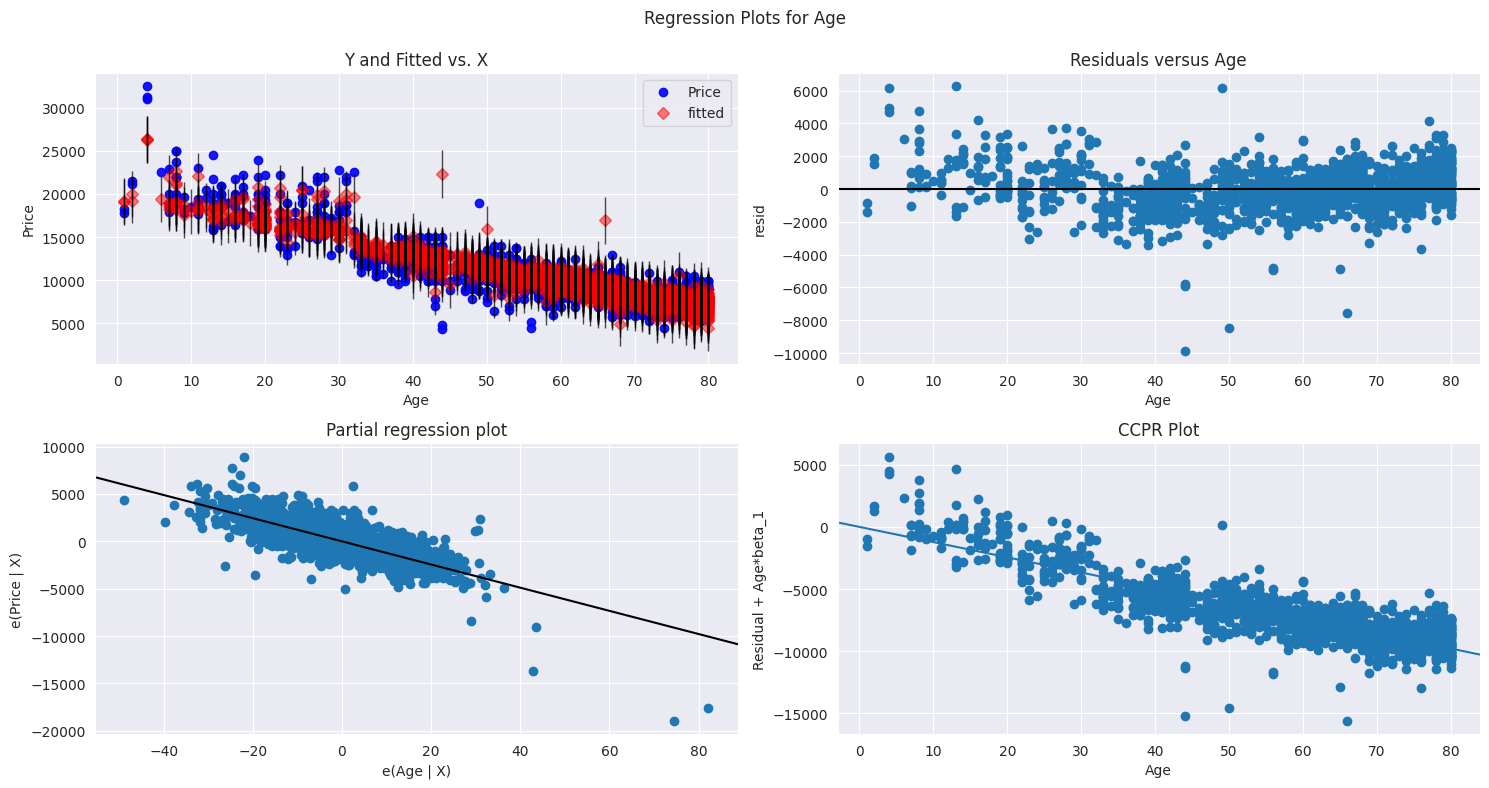

In [78]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Age', fig = fig)

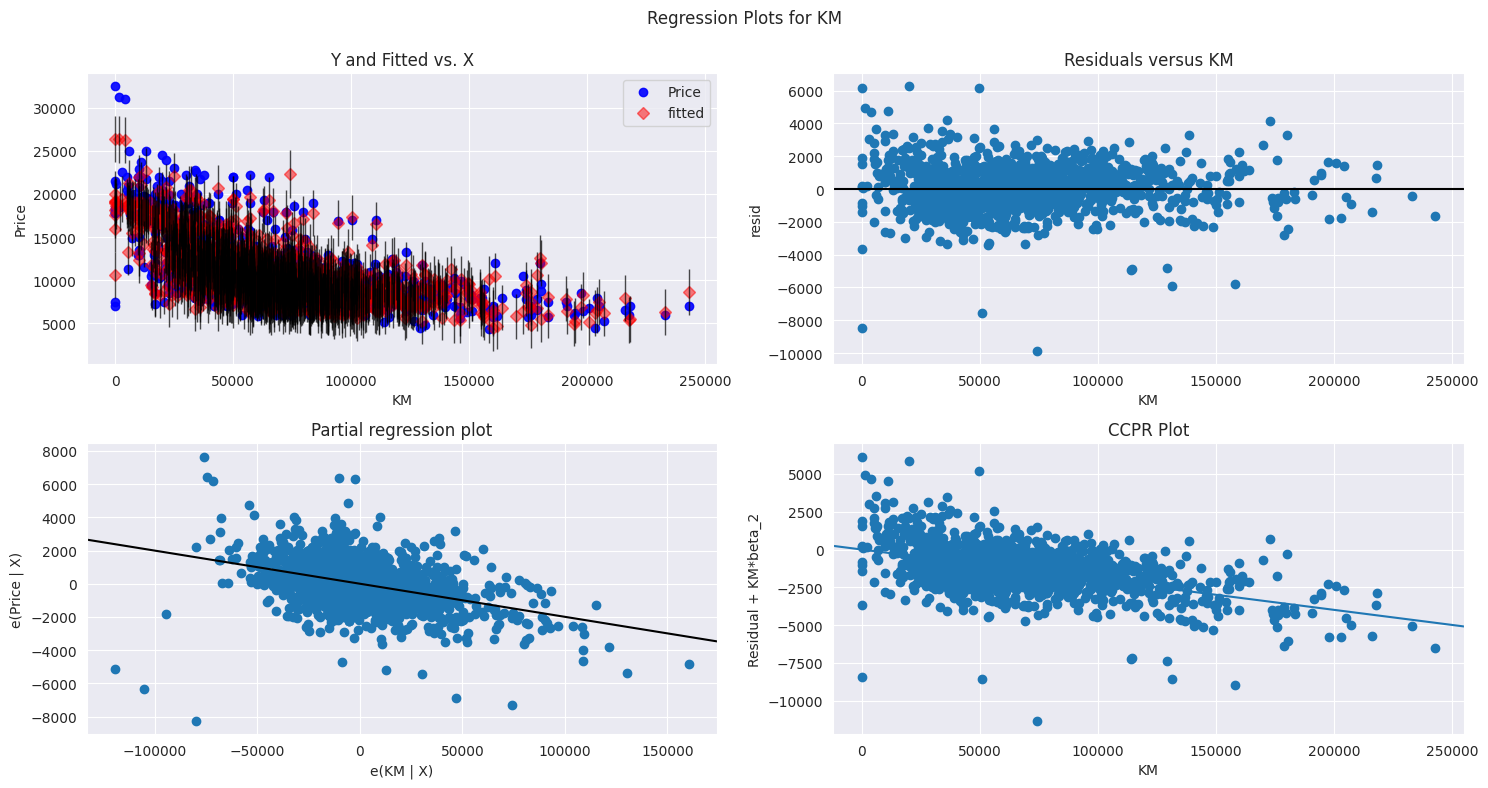

In [80]:
fig  = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'KM',fig = fig)

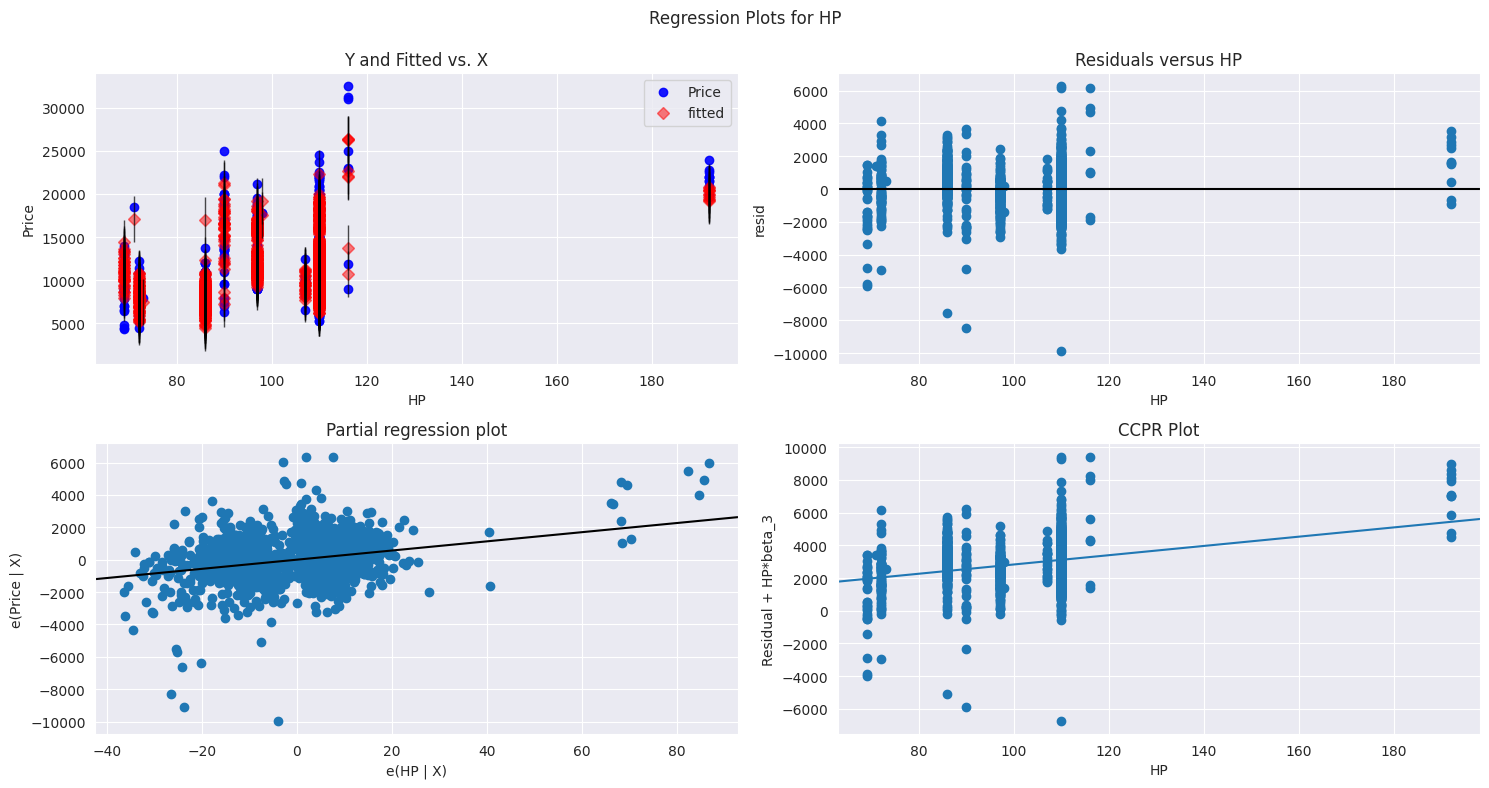

In [81]:
fig  = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig = fig)

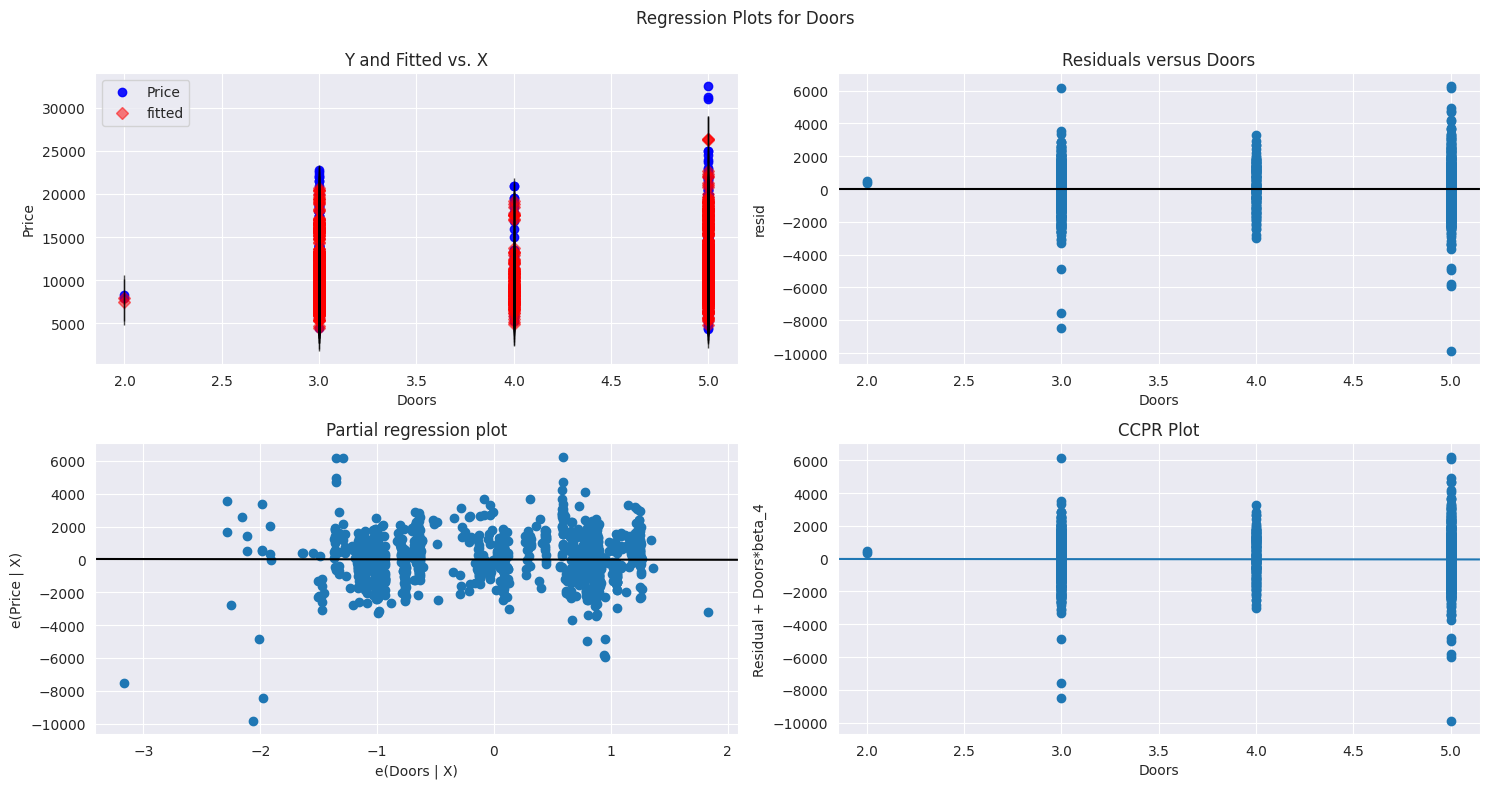

In [82]:
fig  = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Doors', fig = fig)

ValueError: ignored

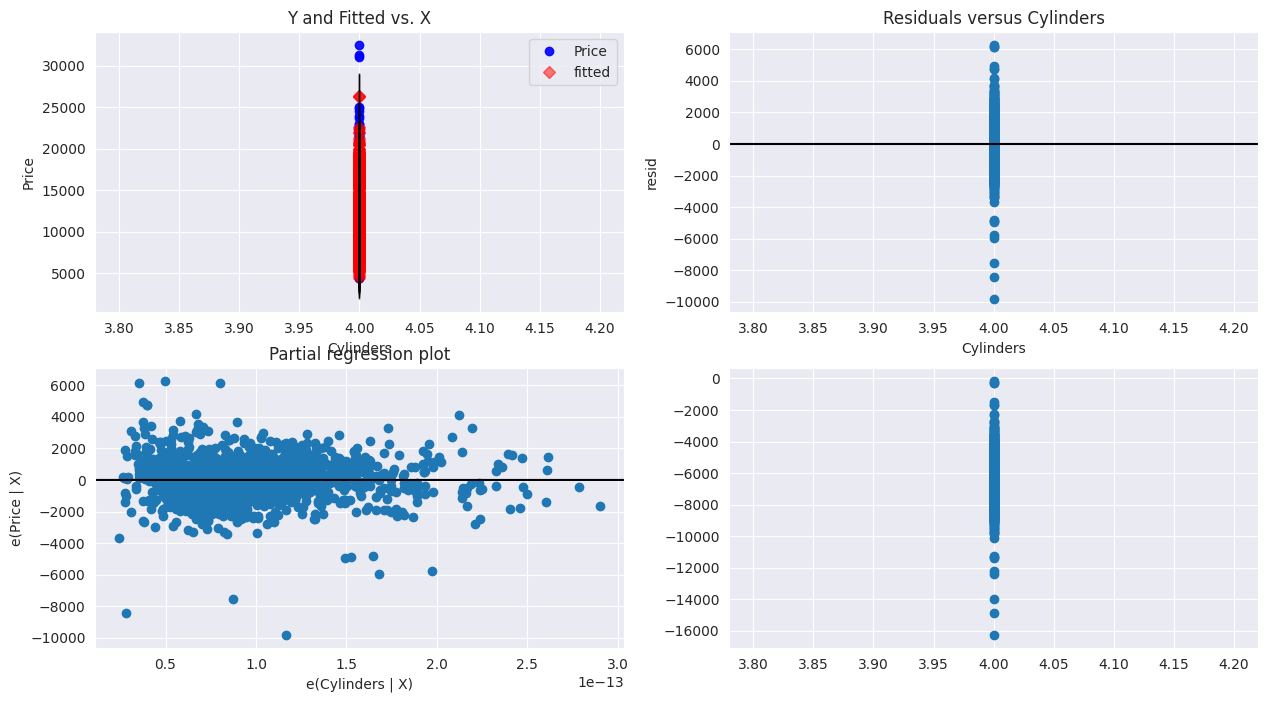

In [83]:
fig  = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Cylinders', fig = fig)

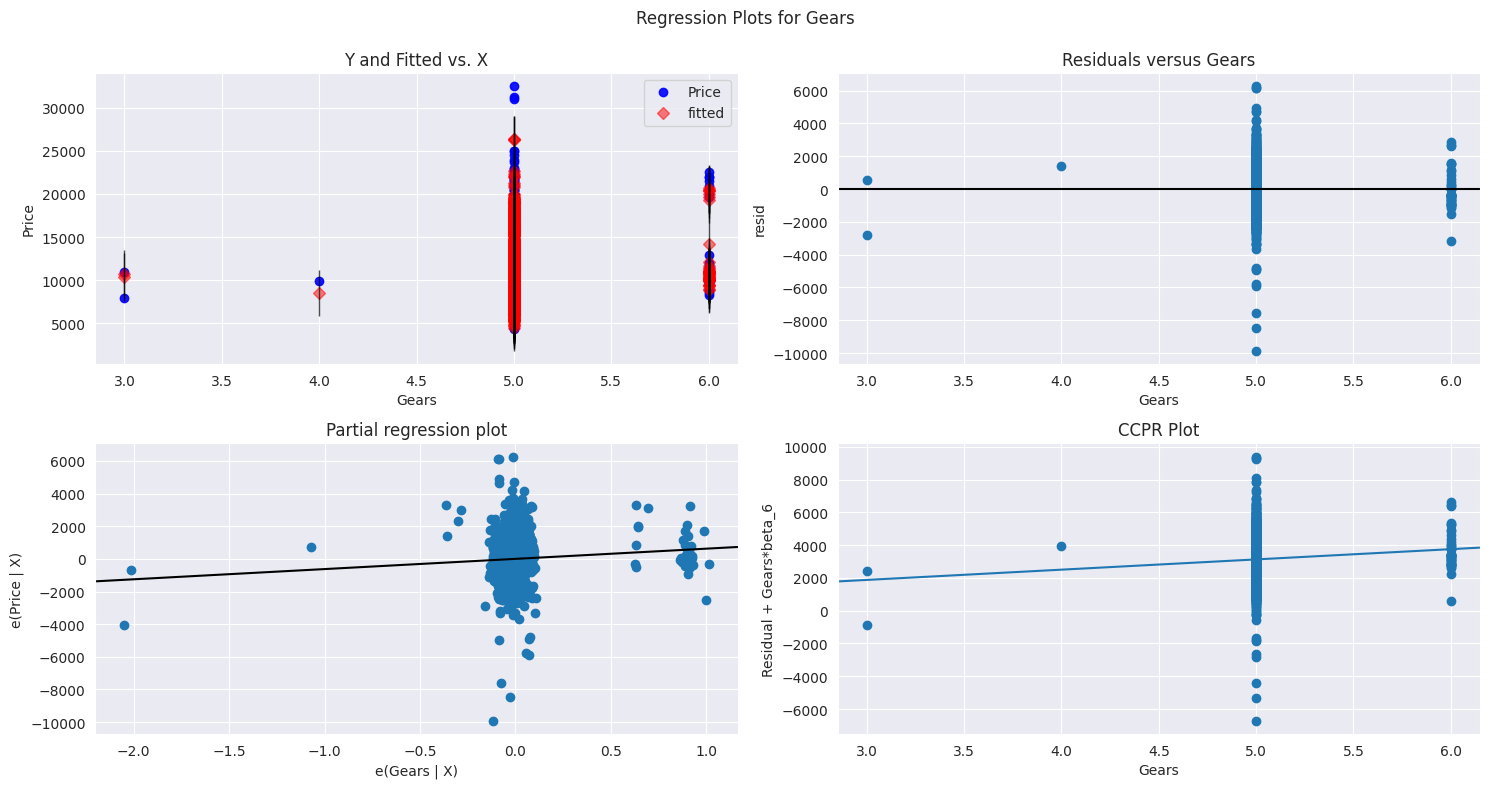

In [84]:
fig  = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Gears', fig = fig)

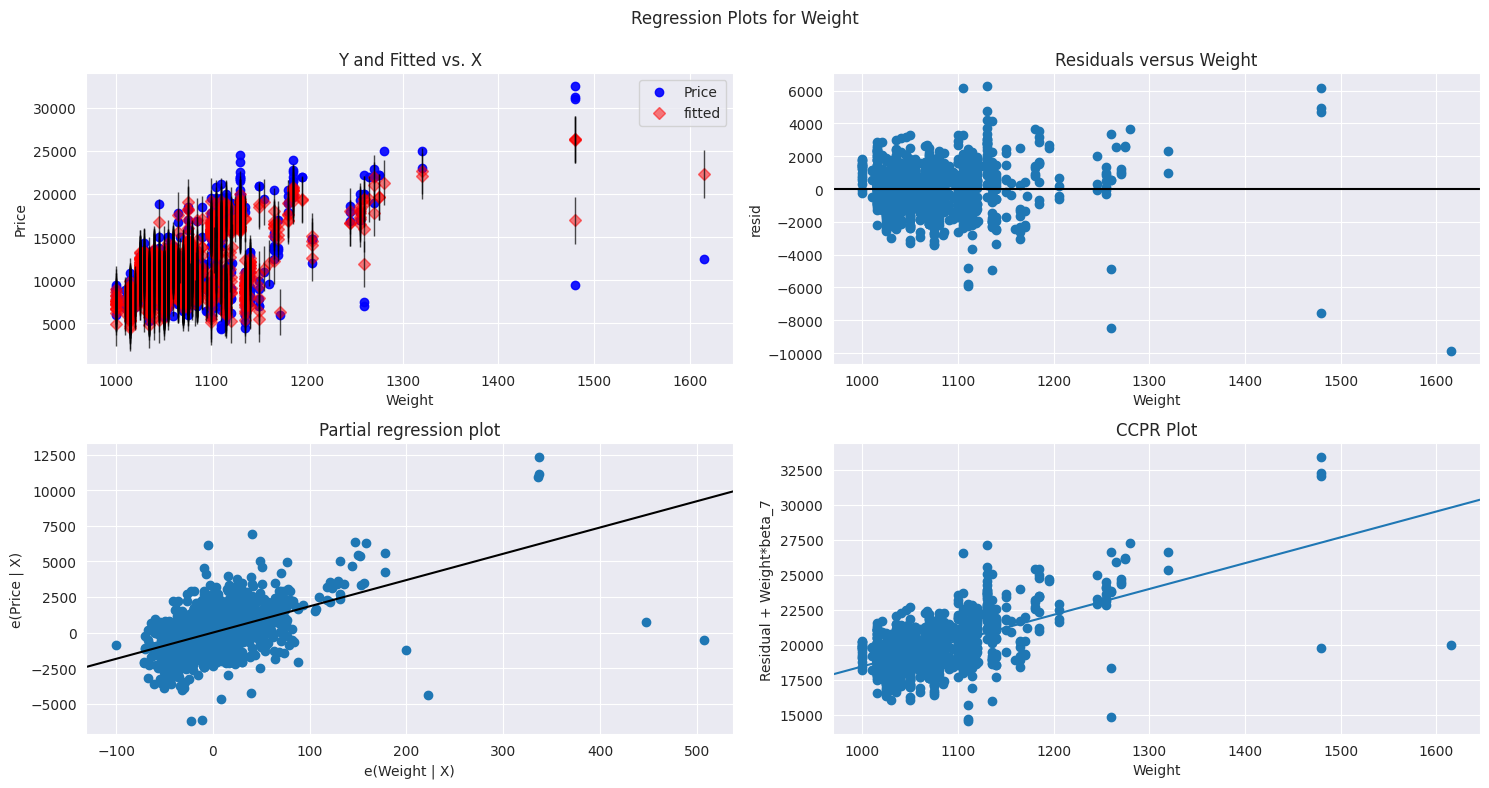

In [85]:
fig  = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Weight', fig = fig)

# Model Deletion Diagnostics (Detecting influencers/outliers)

Two Techniques:
1. Cooks distance
2. Leverage Value

In [86]:
# COOKS DISTANCE

model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

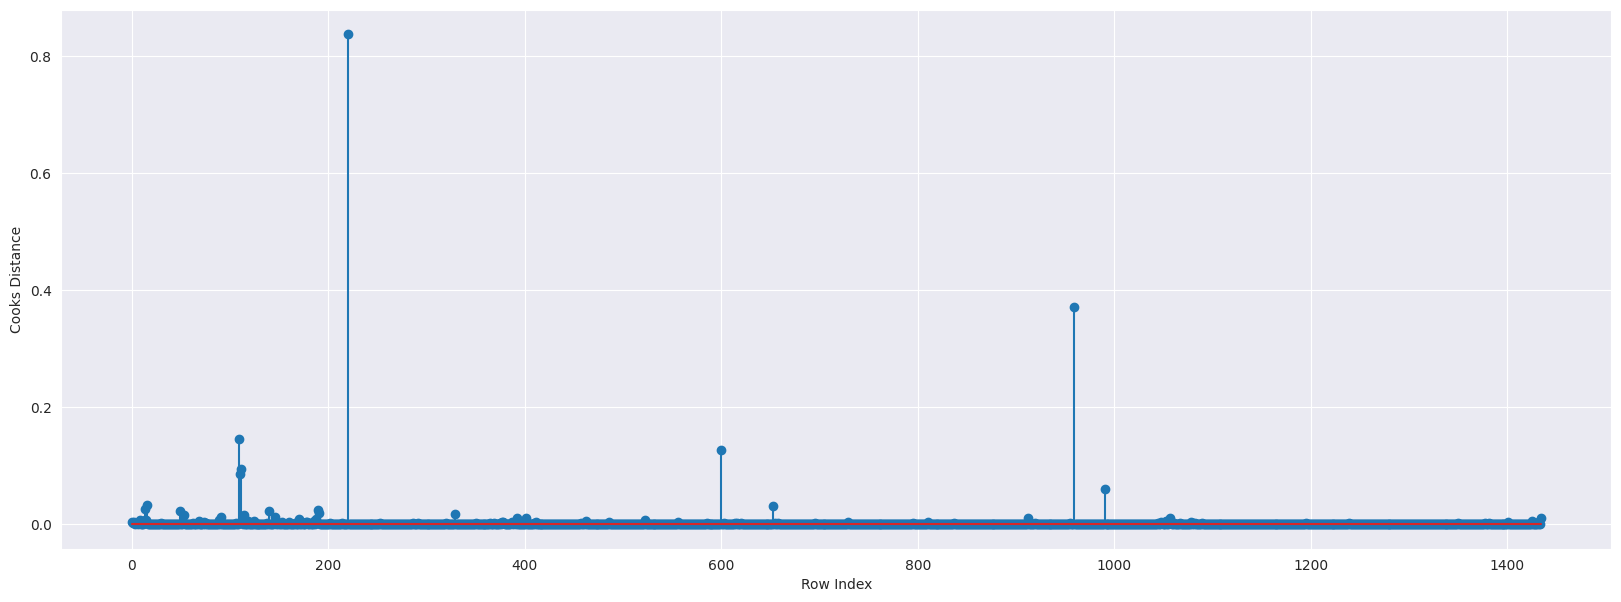

In [87]:
# Plot influencers using stem plot
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [88]:
#  Index and value of influencres where c is more than 0.5
(np.argmax(c), np.max(c))

(220, 0.8366218414219324)

High Influence Points

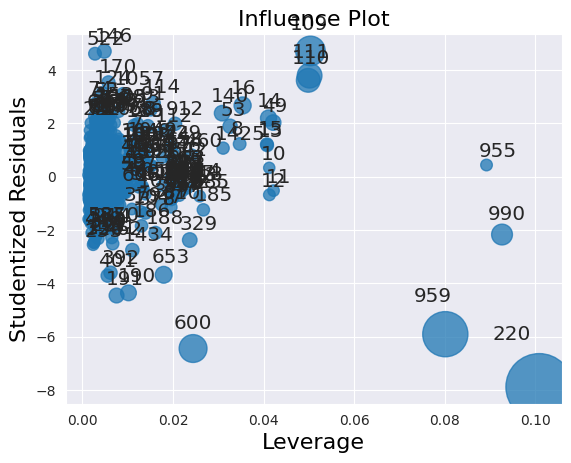

In [89]:
  from statsmodels.graphics.regressionplots import influence_plot
  influence_plot(model)
  plt.show()

In [90]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.018815331010452963

In [92]:
data[data.index.isin([220])]

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
220,12450,44,74172,110,5,4,5,1615


# Improving model

In [97]:
data_new = data.copy()
data_new

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,3,4,5,1025
1431,10845,72,19000,86,3,4,5,1015
1432,8500,71,17016,86,3,4,5,1015
1433,7250,70,16916,86,3,4,5,1015


In [99]:
df = data_new.drop(data_new.index[[220]], axis = 0).reset_index()

In [100]:
df = df.drop(['index'], axis=1)

In [102]:
df.head()

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170


# Model Deletion Diagnostics and Final Model

In [104]:
while model.rsquared < 0.9 :
  for c in [np.max(c)>0.5]:
    model = smf.ols('Price~Age+KM+HP+Cylinders+Gears+Weight+Doors', data = df).fit()
    (c,_) = model.get_influence().cooks_distance
    c
    np.argmax(c), np.max(c)
    df = df.drop(df.index[[np.argmax(c)]], axis = 0).reset_index(drop=True)
    df
  else:
    final_model = smf.ols('Price~Age+KM+HP+Cylinders+Doors+Weight+Gears', data = df).fit()
    final_model.rsquared, final_model.aic
    print(final_model.aic)
    print('Model Accuracy Improved to', final_model.rsquared)

24615.946640054615
Model Accuracy Improved to 0.871573984499073
24545.133446527347
Model Accuracy Improved to 0.8763135933611059
24515.80716638453
Model Accuracy Improved to 0.8742506810014556
24492.987534417738
Model Accuracy Improved to 0.8747858274025696
24468.584425887213
Model Accuracy Improved to 0.8725420282891914
24443.989563285846
Model Accuracy Improved to 0.8702824472751031
24408.016872732805
Model Accuracy Improved to 0.8719728263311248
24384.69510785865
Model Accuracy Improved to 0.8715398632894149
24362.80768973764
Model Accuracy Improved to 0.8710109285430538
24340.701064194003
Model Accuracy Improved to 0.8705876061514711
24316.915561845064
Model Accuracy Improved to 0.8699267446027035
24278.596303646336
Model Accuracy Improved to 0.8716407362104224
24256.89244465951
Model Accuracy Improved to 0.8711639847240219
24216.084421573993
Model Accuracy Improved to 0.8731234771502202
24196.62773892985
Model Accuracy Improved to 0.8724337738894964
24176.98578047664
Model Accurac

In [105]:
df.head(1)

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,15950,25,28450,110,3,4,5,1120


In [115]:
new_data = pd.DataFrame({'Age':25, 'KM':28450, 'HP':110, 'Doors':3, 'Cylinders':4, 'Gears':5, 'Weight':1120}, index=[1])

In [116]:
new_data

,Age,KM,HP,Doors,Cylinders,Gears,Weight
1,25,28450,110,3,4,5,1120


In [117]:
final_model.predict(new_data)

1    15250.916599
dtype: float64